# Flight Fare Price Prediction

### Problem Statement:
For purchasing an airplane ticket, the traditional purchase approach is to buy a ticket far
in advance of the flight’s departure date to avoid the risk that the price may increase
quickly before the date of departure. However, this is not always the case; if airline
corporations wish to increase sales, they can lower prices. Airlines employ a variety of
factors to decide flight ticket rates, including whether the trip is around the holidays, the
quantity of available seats on the plane, and even the month. Some of the variables can
be seen, while others are hidden. In this context, customers are attempting to discover
the best day to purchase a ticket, while airline firms, on the other hand, are attempting to
maximize overall revenue.

The main objective here is -
1. Airline companies have the freedom to change the flight ticket prices at any moment.
Travelers can save money if they choose to buy a ticket when its price is the lowest.

2. The problem is how to determine when is the best time to buy flight ticket for the
desired destination and period.

3. Airline companies use many different variables to determine the flight ticket prices:
indicator whether the travel is during the holidays, the number of free seats in the plane
etc. Some of the variables are observed, but some of them are hidden

4. In other word, when given the historical price and the current price of a flight for a
specific departure date, algorithms need to determine whether it is suitable to buy or

### Importing the dataset

since the data is in the excel format we have to use pandas read_excel to load the data

After loading it is important to check the complete the inforamtion in the data as it can indication many of the hidden information such as null information columns and rows.

Check whether any null values are there or not if it is present in it we have to do following steps. i. Imputing data using imputation method present in the following can be done. ii. Filling nan values with mean ,median and mode using fillna() method

Describe the data --> Which can give statsical analysis.

In [1]:
import pandas as pd

In [7]:
df=pd.read_excel(r'F:\Projects\my_flight_price_pred\notebooks\data\flight_price.xlsx')

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [11]:
print("Name of the Columns are:- ",df.columns)
print("-"*100)
print()
print("The no. of record present in the dataset are: ",df.shape)

Name of the Columns are:-  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
----------------------------------------------------------------------------------------------------

The no. of record present in the dataset are:  (10683, 11)


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### Observation:

 From the above observation we get to know that there are no Nan value present in the dataset. Except in the Columne name "Route" and in the "Total_stop" with a very less number.
What to do now:

  I will try to take a variable with "feature_with_nan" and put the Nan value in it and after that i 
  will find the percentage of Nan value in to its specifics columns. So, that we can uderstand what to do 
  with the Nan Value.

In [15]:
feature_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()]
feature_with_nan

['Route', 'Total_Stops']

In [18]:
import numpy as np

In [19]:
for feature in feature_with_nan:
    print(feature,np.round(df[feature].isnull().mean(),4), "% missing value")

Route 0.0001 % missing value
Total_Stops 0.0001 % missing value


### <u>observation:
</u>
   we get to know that there is a very less percentage of Nan value present
   in the missing columns.
   Route has only 0.0001% of missing value. and
   Total_stops has also only 0.0001% of missing value.


### <u>What to do now:</u>
   As there are very less number of missing value or i can say that only 1 records of 
   two coulmns have missing value. So i am replacing the missing value with median but without 
   doing any type of visulaziation.

In [21]:
df.fillna(df[feature].isnull().median(),inplace=True)


In [23]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Handling Temporal Variable
#### 1. Date of Journey to (Day and Month of journey)

In [25]:
# Extracting Date from the Date of Journey:
df["Day_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day

# Extracting Month from the Date of journey:
df["Month_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [27]:
# since we have converted Date of journey columns into integer so we can drop the columns Date of Journey as it is of no use:
df.drop(["Date_of_Journey"],axis=1,inplace=True)

#### 2. Dep_Time to (Hours and minute of Dep)

In [29]:
# Extracting the Hours and min from the Dep_Time

# Hours
df["Dep_hours"]=pd.to_datetime(df["Dep_Time"]).dt.hour

# minute
df["Dep_minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute

# now there is a no use of the columns "Dep_Time" so we will drop it
df.drop(["Dep_Time"],axis=1,inplace=True)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_15984\689152603.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_hours"]=pd.to_datetime(df["Dep_Time"]).dt.hour
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_15984\689152603.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute


### 3. Arrival_Timing to (Arrival_hours and Arrival_minute)


In [30]:
# Extracting the Arrival Hours and Minute from the Arrival Timming

# Arrival hours:
df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour

# Arrival minute:
df["Arrival_minute"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

#now there is a no use of the columns "Arrival_Time" so we will drop it:
df.drop(["Arrival_Time"],axis=1,inplace=True)

C:\Users\Nikhil\AppData\Local\Temp\ipykernel_15984\4060165566.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_hour"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
C:\Users\Nikhil\AppData\Local\Temp\ipykernel_15984\4060165566.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_minute"]=pd.to_datetime(df["Arrival_Time"]).dt.minute


##### 4. Duration to (Duration_hour and Duration_minutes)

In [33]:
# Time taken by plane to reach destination is called duration
# it is the difference between Departure time and Arrival time

# convert the duration columns into list because we have to split it--
duration =list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i]:
            duration[i] = '0h {}'.format(duration[i].strip())
            
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split()[0][:-1]))
    duration_minutes.append(int(duration[i].split()[1][:-1]))
    
df["Duration_hours"]=duration_hours
df["Duratin_minutes"]=duration_minutes


# now i will drop the "Duration" columns as it has of now use:--
df.drop(['Duration'],axis=1,inplace=True)

#### Observation of Temporal Variable:

    1)  In Date of journey i have split it into a Day and Month of Journey and drop the "Date of Journey" columns.
    2)  In Dep_Time i have split it into hours and mintues so we can easliy determine the time spend.
    3)  In Arrival Time we can uderstand easily by Arrival_hours and arrival_minute.
    4)  Duration is the difference between Departure time and Arrival time

In [35]:
# Thus the new data will look like--

df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hours,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duratin_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0


### Handling Categorical Feature

Type of Categorical feature are:--

   1. Nominal data --> data are not in any order --> OneHotEncoder is used in this case
   2. Ordinal data --> data are in order --> LabelEncoder is used in this case

In [36]:
categorical_feature=[feature for feature in df.columns if df[feature].dtype == "O"]
categorical_feature

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Nominal Categorical data are:
       1. Airline
       2. Source
       3. Destination

 Ordinal Categorical data are:
       1. Total_step

In [39]:
df[categorical_feature].describe()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683
unique,12,5,6,129,6,10
top,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info
freq,3849,4537,4537,2376,5625,8345


In [40]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [41]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

From the above count values we observe that people travels mostly by jet airways

In [44]:
#import liabaries for data visulazation and EDA:

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import cufflinks as cf
cf.go_offline()

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

f:\Projects\my_flight_price_pred\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



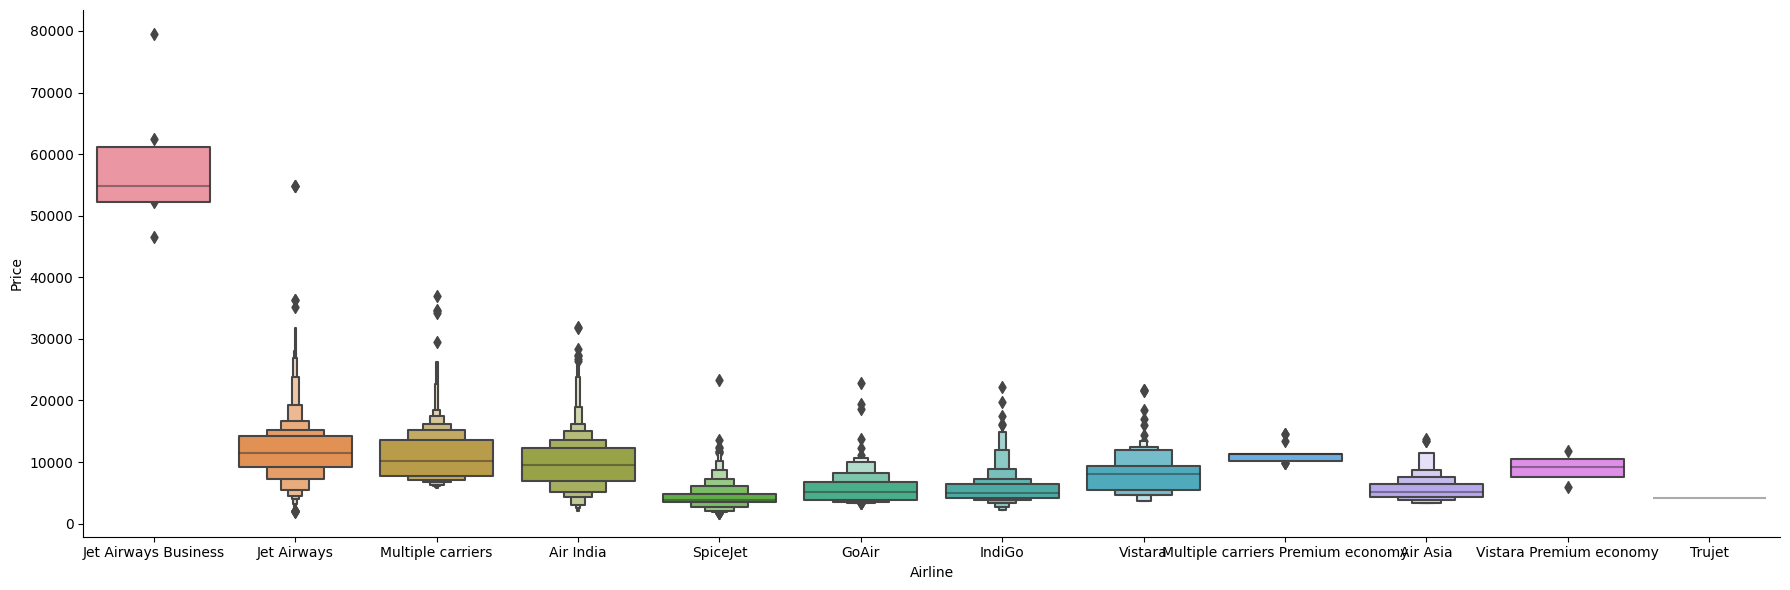

In [58]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

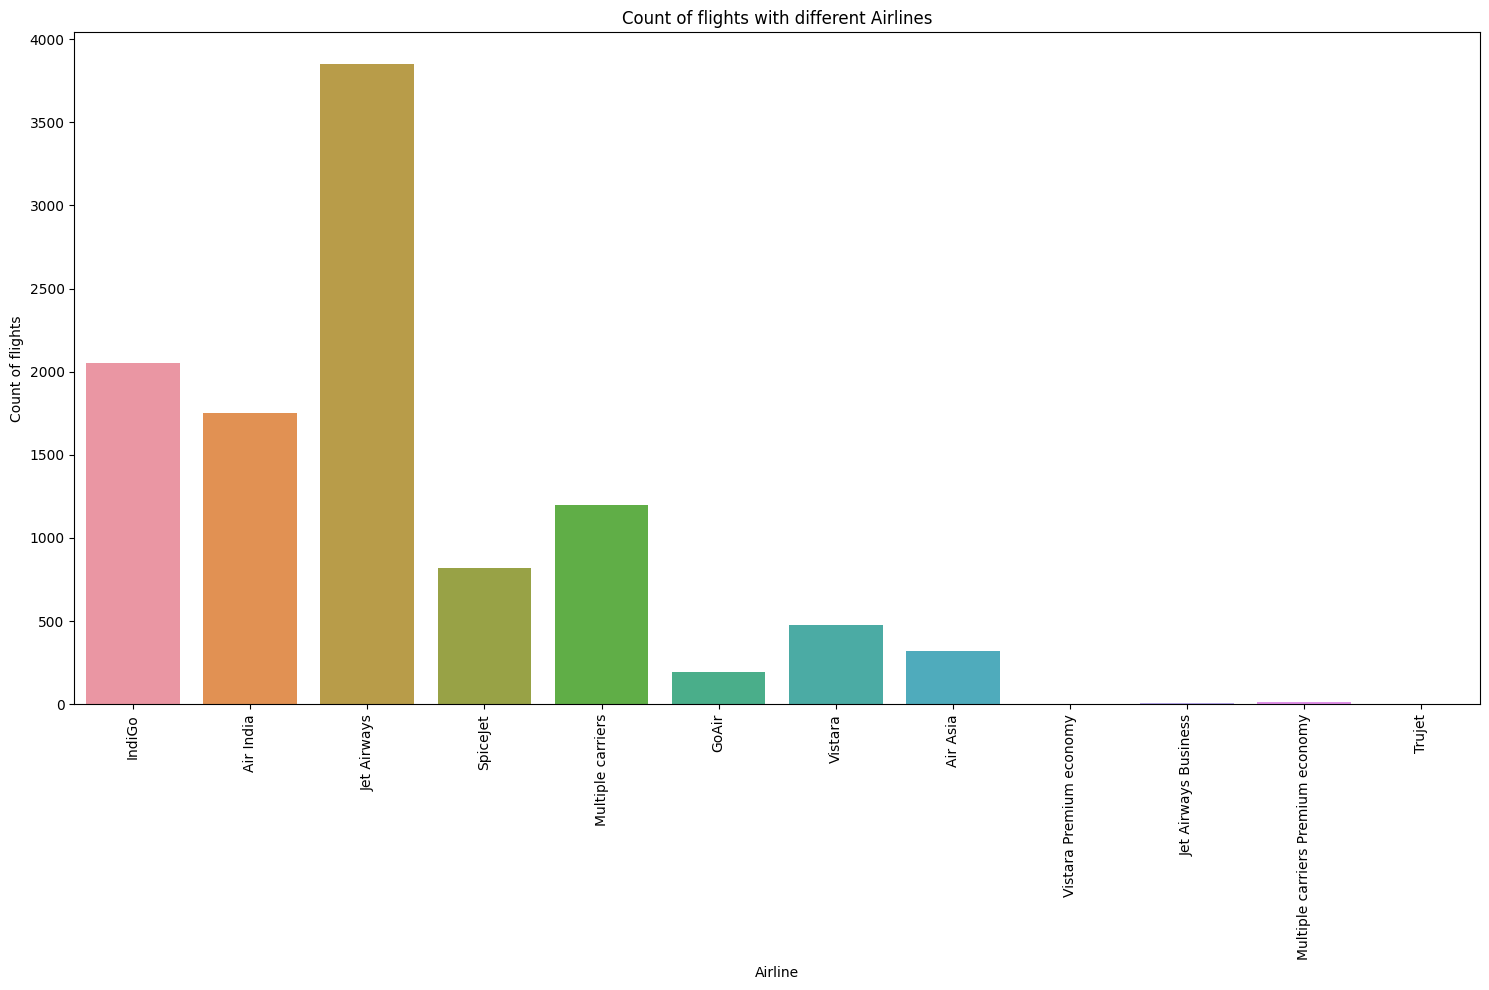

In [59]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

From above graph we can clearly see that Jet airways has maximum number of airplanes.

In [61]:
# Airline is a Nominal Categorical Data we will do OneHotEncoding

airline=df[["Airline"]]
airline=pd.get_dummies(airline,drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False
